In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt
from sklearn import (metrics, linear_model, preprocessing)
from sklearn.model_selection import cross_validate
from sklearn.impute import SimpleImputer
%matplotlib inline
import plotly.offline as py
from plotly import tools
import plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode , iplot , plot
init_notebook_mode(connected = True)
import cufflinks as cf
cf.go_offline()

import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from plotly import tools
from scipy.stats import norm

from sklearn import (metrics, linear_model, preprocessing)
# from sklearn.metrics import mean_squared_error , r2_score
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from statsmodels.tools import add_constant

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_rows', 200)

pd.options.mode.chained_assignment = None

path1 = 'Dataset/churn_data.csv'  # note i kept the csv file in dataset file so its easy to call from there
churn_data = pd.read_csv(path1, na_values='NA')

path2 = 'Dataset/customer_data.csv'
customer_data = pd.read_csv(path2 , na_values='NA')

path3 = 'Dataset/internet_data.csv'
internet_data = pd.read_csv(path3 , na_values='NA')

# Now merging the files into one file

# Merging on 'customerID'

In [3]:
df_1 = pd.merge(churn_data, customer_data, how='inner', on='customerID')

# Final dataframe with all predictor variables

In [4]:
df = pd.merge(df_1, internet_data, how='inner', on='customerID')

In [5]:
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [6]:
print('Customer Data - rows:' , df.shape[0],'columns:', df.shape[1])

Customer Data - rows: 7043 columns: 21


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [8]:
# Check % of null values in df
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,StreamingMovies,gender,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,...,StreamingTV,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,customerID
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df.isna().any().any()

False

In [10]:
df.isna().sum()

customerID          0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

In [11]:
# Note this way we can see the data has got many categorical varialbes and we need to convert for our model
df.describe

<bound method NDFrame.describe of       customerID  tenure PhoneService        Contract PaperlessBilling  \
0     7590-VHVEG       1           No  Month-to-month              Yes   
1     5575-GNVDE      34          Yes        One year               No   
2     3668-QPYBK       2          Yes  Month-to-month              Yes   
3     7795-CFOCW      45           No        One year               No   
4     9237-HQITU       2          Yes  Month-to-month              Yes   
...          ...     ...          ...             ...              ...   
7038  6840-RESVB      24          Yes        One year              Yes   
7039  2234-XADUH      72          Yes        One year              Yes   
7040  4801-JZAZL      11           No  Month-to-month              Yes   
7041  8361-LTMKD       4          Yes  Month-to-month              Yes   
7042  3186-AJIEK      66          Yes        Two year              Yes   

                  PaymentMethod  MonthlyCharges TotalCharges Churn  gender  \

In [12]:
# Note here we can see all the stats on the numerical columns
df.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [13]:
# df is clean and has no null values

In [14]:
# Note - Total Charges column is an object we need to convert it into a float .

In [15]:
#Also the columns have missing values in the total charges columns that do not have been replaced with placeholders " "

In [16]:
# So we need to drop them .

In [17]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [18]:
df['TotalCharges'].dtype

dtype('O')

In [19]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", 0).astype('float32')

In [20]:
df['tenure'].value_counts

<bound method IndexOpsMixin.value_counts of 0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7043, dtype: int64>

In [21]:
df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39])

In [22]:
df['tenure'].dtype

dtype('int64')

In [23]:
df.columns

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

In [24]:
# EDA - 

In [25]:
#lets have a look at the distribution of Churn and no churn in df

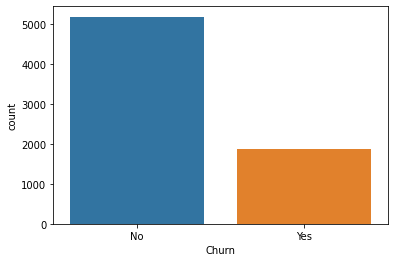

In [26]:
sns.countplot(df['Churn'])

# What is the percentage for churn and no churn customers

In [27]:
#labels
lab = df["Churn"].value_counts().keys().tolist()
#values
val = df["Churn"].value_counts().values.tolist()

trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'royalblue' ,'red'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Customer attrition in data",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)

# Observation : In our data , 73.5% - Churn and 26.5% no churn rate

# Distribution of male and female customers

In [28]:
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

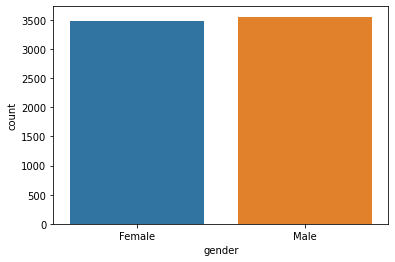

In [29]:
sns.countplot(df['gender'])

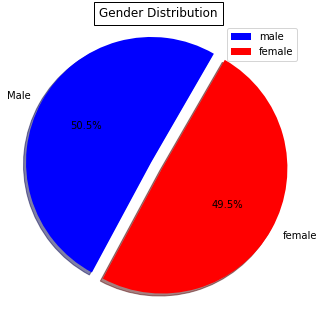

In [30]:
gender_val = ['male' , 'female']
gender = df['gender'].value_counts()

gender = gender.astype(float)
fig = plt.figure(figsize = (8,4))
ax = fig.add_axes((0,0,0.5,1))
ax.set_title('Gender Distribution' , bbox={'facecolor' : 'white' , 'pad':5})
labels = 'Male' , 'female'
colors = ['blue','red']
explode = (0.1 , 0)
plt.pie(gender , explode=explode , labels=labels , colors = colors , autopct = '%1.1f%%' , shadow = True , startangle=60)
plt.legend(labels=gender_val)
plt.axis('equal')
plt.show()

# Observation : Our customer base is pretty balanced though we have just a few more male customers over females

In [31]:
#labels
lab = df["gender"].value_counts().keys().tolist()
#values
val = df["gender"].value_counts().values.tolist()

trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'royalblue' ,'red'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Customer attrition in data",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)

# Get Categorical Variables

In [32]:
def get_cat(df):
    """get list of cat features from df"""
    cat = []
    for x in df.columns:
        if df[x].dtypes == 'object':
            cat.append(x)
    return cat

cat1 = get_cat(df)

In [33]:
cat1

['customerID',
 'PhoneService',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn',
 'gender',
 'Partner',
 'Dependents',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

# Get Numerical variables in df

In [34]:
def get_nom(df):
    """get nom features"""
    nom = []
    for x in df.columns:
        if df[x].dtypes != 'object':
            nom.append(x)
    return nom[2:] # no need for feature id and age but customise according to df

nom1 = get_nom(df)

In [35]:
nom1

['TotalCharges', 'SeniorCitizen']

# Density plot of DataFrame

In [36]:
# Note there are only 3 actual numerical columns in the dataframe

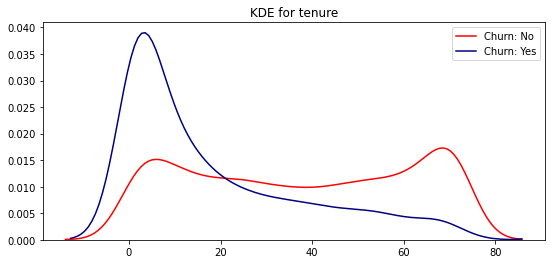

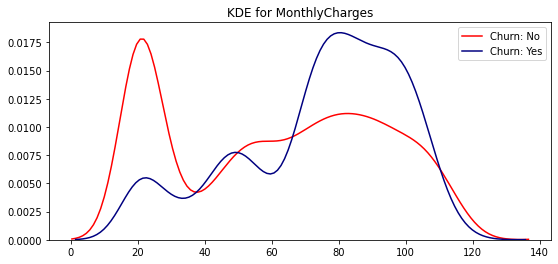

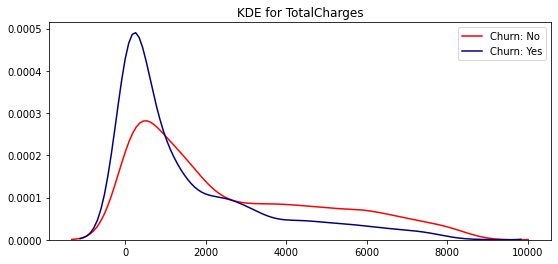

In [37]:
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(df[df['Churn'] == 'No'][feature].dropna(), color= 'red', label= 'Churn: No')
    ax1 = sns.kdeplot(df[df['Churn'] == 'Yes'][feature].dropna(), color= 'navy', label= 'Churn: Yes')
kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')

# Observation:

From the plots above we can conclude that:

Recent clients are more likely to churn
Clients with higher MonthlyCharges are also more likely to churn
Tenure and MonthlyCharges are probably important features
In fact we can see some boundaries when we use scatter plots:

In [38]:
df0 = df.copy()

# Gender and Age

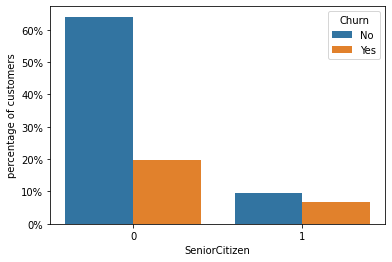

In [39]:
def barplot_percentages(feature, orient='v', axis_name="percentage of customers"):
    ratios = pd.DataFrame()
    m = df.groupby(feature)["Churn"].value_counts().to_frame()
    m = m.rename({"Churn": axis_name}, axis=1).reset_index()
    m[axis_name] = m[axis_name]/len(df)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='Churn', data= m, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='Churn', data= m, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot()
barplot_percentages("SeniorCitizen")

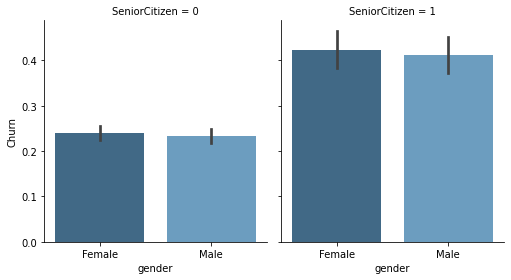

In [53]:
df0['churn_rate'] = df0['Churn'].replace("No", 0).replace("Yes", 1)
g = sns.FacetGrid(df, col="SeniorCitizen", height=4, aspect=.9 )
ax = g.map(sns.barplot, "gender", "Churn", palette = "Blues_d", order= ['Female', 'Male'])

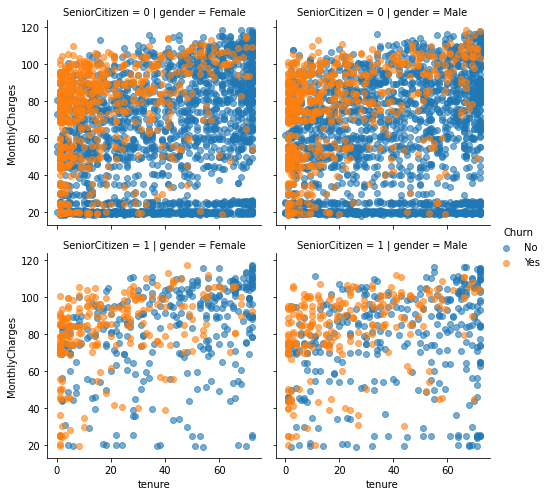

In [41]:
x = sns.FacetGrid(df, row='SeniorCitizen', col="gender", hue="Churn", height=3.5)
x.map(plt.scatter, "tenure", "MonthlyCharges", alpha=0.6)
x.add_legend();

# Observations

Gender is not an indicative of churn.

SeniorCitizens are only 16% of customers, but they have a much higher churn rate: 42% against 23% for non-senior customers.

There are no special relations between this categorical values and the main numerical features.

# Partner and dependents

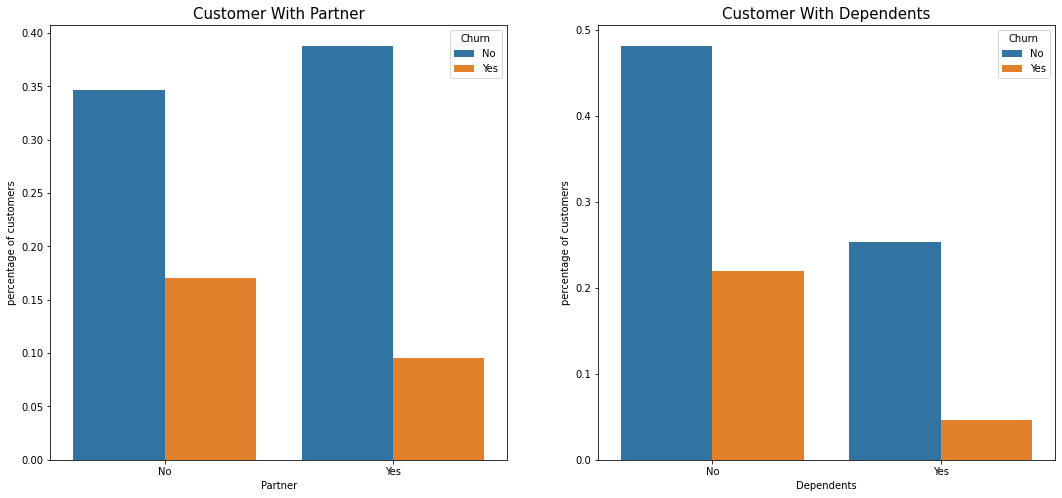

In [42]:
fig, axis = plt.subplots(1, 2, figsize=(18,8))
axis[0].set_title("Customer With Partner" , fontsize = 15)
axis[1].set_title("Customer With Dependents" , fontsize = 15)
axis_y = "percentage of customers"
# Plot Partner column
gp_partner = df.groupby('Partner')["Churn"].value_counts()/len(df)
gp_partner = gp_partner.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Partner', y= axis_y, hue='Churn', data=gp_partner, ax=axis[0])
# Plot Dependents column
gp_dep = df.groupby('Dependents')["Churn"].value_counts()/len(df)
gp_dep = gp_dep.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Dependents', y= axis_y, hue='Churn', data=gp_dep, ax=axis[1])

# Observations

- Customers who do not have partners are more likely to churn

- Customers without dependents are also more likely to churn

# Phone services

There are only two features here: if the client has phone and if he has more than one line. Both can be summed up in one chart:

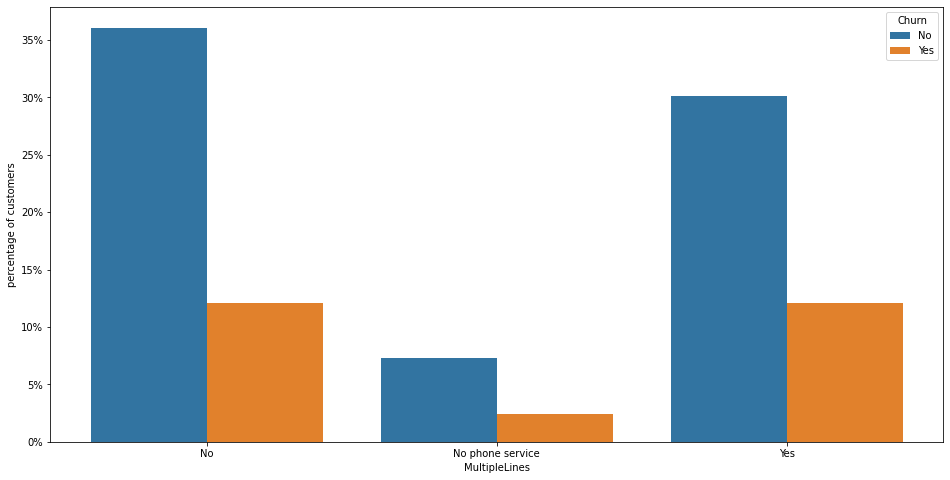

In [43]:
plt.figure(figsize=(16, 8))
barplot_percentages("MultipleLines", orient='v')

# Observation

- Only a few customers doesn't have phone service

- Customers with multiple lines have a slightly higher churn rate


# How does having multiple lines affects the monthly charges:

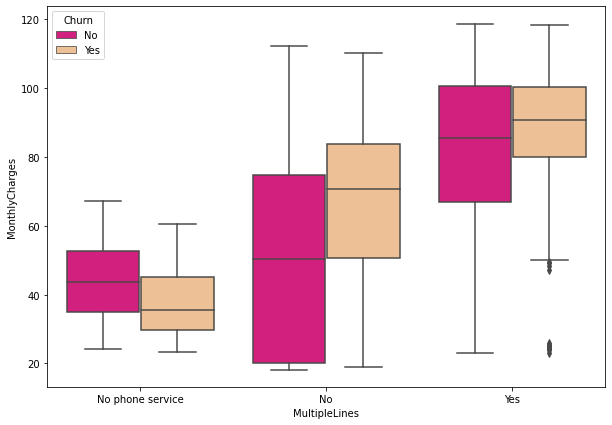

In [44]:
# Change to boxplot
fig ,ax = plt.subplots(figsize = (10,7))
ax = sns.boxplot(x="MultipleLines", y="MonthlyCharges", hue="Churn"
                 , palette="Accent_r", data=df)

# Feature Engineering - Dealing with Categorical columns

In [ ]:
# Converting Yes to 1 and No to 0

In [45]:
df['PhoneService'] = df['PhoneService'].map({'Yes' : 1 , 'No' : 0})
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes' : 1 , 'No' : 0})
df['Churn'] = df['Churn'].map({'Yes' : 1 , 'No' : 0})
df['Partner'] = df['Partner'].map({'Yes' : 1 , 'No':0})
df['Dependents'] = df['Dependents'].map({'Yes': 1, 'No': 0})


# Creating dummy variables for the categorical variables

In [52]:
df.columns

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

In [ ]:
# Creating a dummy variable for the variable 'Contract' and dropping the first one.
contract = pd.get_dummies(df['Contract'],prefix='Contract',drop_first=True)
#Adding the results to the master dataframe
df = pd.concat([df,contract],axis=1)

# Creating a dummy variable for the variable 'PaymentMethod' and dropping the first one.
paymentMethod = pd.get_dummies(df['PaymentMethod'],prefix='PaymentMethod',drop_first=True)
#Adding the results to the master dataframe
df = pd.concat([df,paymentMethod],axis=1)

# Creating a dummy variable for the variable 'gender' and dropping the first one.
gender = pd.get_dummies(df['gender'],prefix='gender',drop_first=True)
#Adding the results to the master dataframe
df = pd.concat([df,gender],axis=1)

# Creating a dummy variable for the variable 'MultipleLines' and dropping the first one.
multipleLines = pd.get_dummies(df['MultipleLines'],prefix='MultipleLines')
#  dropping MultipleLines_No phone service column
multipleLines = multipleLines.drop(['MultipleLines_No phone service'],1)
#Adding the results to the master dataframe
df = pd.concat([df, multipleLines],axis=1)

# Creating a dummy variable for the variable 'InternetService' and dropping the first one.
internetService = pd.get_dummies(df['InternetService'],prefix='InternetService',drop_first=True)
#Adding the results to the master dataframe
df = pd.concat([df,internetService],axis=1)

# Creating a dummy variable for the variable 'OnlineSecurity'.
onlineSec = pd.get_dummies(df['OnlineSecurity'],prefix='OnlineSecurity')
onlineSec = onlineSec.drop(['OnlineSecurity_No internet service'],1)
#Adding the results to the master dataframe
df = pd.concat([df,onlineSec],axis=1)

# Creating a dummy variable for the variable 'OnlineBackup'.
onlinebackup =pd.get_dummies(df['OnlineBackup'],prefix='OnlineBackup')
onlinebackup =onlinebackup.drop(['OnlineBackup_No internet service'],1)
#Adding the results to the master dataframe
df = pd.concat([df,onlinebackup],axis=1)

# Creating a dummy variable for the variable 'DeviceProtection'. 
DeviceProtection =pd.get_dummies(df['DeviceProtection'],prefix='DeviceProtection')
DeviceProtection = DeviceProtection.drop(['DeviceProtection_No internet service'],1)
#Adding the results to the master dataframe
DeviceProtection = pd.concat([df,DeviceProtection],axis=1)

# Creating a dummy variable for the variable 'TechSupport'. 
techsupport = pd.get_dummies(df['TechSupport'],prefix='TechSupport')
techsupport = techsupport.drop(['TechSupport_No internet service'],1)
#Adding the results to the master dataframe
df = pd.concat([df,techsupport],axis=1)

# Creating a dummy variable for the variable 'StreamingTV'.
StreamingTV =pd.get_dummies(df['StreamingTV'],prefix='StreamingTV')
StreamingTV = StreamingTV.drop(['StreamingTV_No internet service'],1)
#Adding the results to the master dataframe
df = pd.concat([df,StreamingTV],axis=1)

# Creating a dummy variable for the variable 'StreamingMovies'. 
StreamingMovies =pd.get_dummies(df['StreamingMovies'],prefix='StreamingMovies')
StreamingMovies = StreamingMovies.drop(['StreamingMovies_No internet service'],1)
#Adding the results to the master dataframe
df = pd.concat([df,StreamingMovies],axis=1)

In [ ]:
# Checking results

In [ ]:
df.columns

# I have succesfully dropped all the columns here and set drop first to true to prevent Multicollinearity

In [ ]:
# Check results of dataframe

In [ ]:
df.head()

# Note here we can see above that we still example male and female in the gender column so we need to drop this columns

# Dropping the repeated columns

In [ ]:
# We have created dummies for the below variables, so we can drop them
df_new = df.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport','StreamingTV', 'StreamingMovies'], 1)

In [ ]:
df_new.head()

In [ ]:
len(df_new.columns)

In [ ]:
df_new.info()

In [ ]:
# run this if anything goes wrong and you need to avoid restarting the kernel
df_new1 = df_new.copy()

In [ ]:
df_new = df_new1.copy()

# Checking for outliers

In [ ]:
num_df = df_new[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]

# Checking outliers at 25%,50%,75%,90%,95% and 99% Percentiles in on go

In [ ]:
num_df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

# Observation

### From the distribution shown above, you can see that there no outliers in the data. The numbers are gradually increasing.

In [ ]:
# Removing NaN TotalCharges rows
df_new = df_new[~np.isnan(df_new['TotalCharges'])]

In [ ]:
# Checking percentage of missing values after removing the missing values
round(100*(df_new.isnull().sum()/len(df_new.index)), 2)

# Standardization of Features

In [ ]:
# here we normalize our continues variables

In [ ]:
df1 = df_new[['tenure','MonthlyCharges','TotalCharges']]

In [ ]:
normalized_df=(df1 - df1.mean())/df1.std()

In [ ]:
# dropping the continues columns from the dataframe 
df_new = df_new.drop(['tenure','MonthlyCharges','TotalCharges'], 1)

In [ ]:
# Concatnating normalized columns to dataframe
df_new = pd.concat([df_new, normalized_df],axis=1)

In [ ]:
# Check results
df_new

# Model Our Building

In [ ]:
from sklearn.model_selection import train_test_split
X = df_new.drop(['customerID' , 'Churn'] , 1)

y = df_new['Churn']


In [ ]:
X_train , x_test , y_train , y_test = train_test_split(X , y , test_size = 0.30 , random_state = 100)

# Running my first Model

In [ ]:
import statsmodels.api as sm
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

# Lets check our Correlation Matrix

In [ ]:
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df_new.corr(),annot = True)
plt.show()

# Checking Max and Min correlation between variables

In [ ]:
def correl(X_train):
    cor = X_train.corr()
    corrm = np.corrcoef(X_train.transpose())
    corr = corrm - np.diagflat(corrm.diagonal())
    print("max corr:",corr.max(), ", min corr: ", corr.min())
    c1 = cor.stack().sort_values(ascending=False).drop_duplicates()
    high_cor = c1[c1.values!=1]
    ## change this value to get more correlation results        
    thresh = 0.9
    display(high_cor[high_cor>thresh])
correl(X)

In [ ]:
# Come here if anything goes wrong 
full_df1 = df_new.copy()

# Removing Highly correlated features from dataframe

In [ ]:
corr_data = full_df1.corr()['Churn'].sort_values(ascending = False)
print(corr_data.tail)

In [ ]:
corr_data.head(11)

In [ ]:
X_train.columns

# Dropping highly correlated variables.

In [ ]:
# 'OnlineSecurity_No'                        
# 'TechSupport_No'                           
# 'InternetService_Fiber optic'              
# 'PaymentMethod_Electronic check'          
# 'OnlineBackup_No'                          
# 'MonthlyCharges'              
# 'PaperlessBilling'                         
# 'SeniorCitizen'                           
# 'StreamingMovies_No'                       
# 'StreamingTV_No'

In [ ]:
X_test2 = x_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','MonthlyCharges','TechSupport_No','StreamingTV_No','StreamingMovies_No'
                      ,'PaperlessBilling','SeniorCitizen'],1)




X_train2 = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','MonthlyCharges','TechSupport_No','StreamingTV_No','StreamingMovies_No'
                      ,'PaperlessBilling','SeniorCitizen'] ,1)

# Checking the Correlation Matrix

After dropping highly correlated variables now let's check the correlation matrix again.

In [ ]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train2.corr(),annot = True)

In [ ]:
# Now after dropping the highly correlated variables , lets re-run our model

In [ ]:
# Logistic regression model
logmodel2 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logmodel2.fit().summary()

# Feature Selection using RFE

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 13)             # running RFE with 13 variables as output
rfe = rfe.fit(X,y)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)          # Printing the ranking

In [ ]:
# Variables selected by RFE 
col = ['PhoneService', 'PaperlessBilling', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check','MultipleLines_No','InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes','TechSupport_Yes','StreamingMovies_No','tenure','TotalCharges']

In [ ]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression()
logsk.fit(X_train[col], y_train)

In [ ]:
#Comparing the model with StatsModels
logm4 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
logm4.fit().summary()

In [ ]:
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [ ]:
df_new.columns
['PhoneService', 'PaperlessBilling', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check','MultipleLines_No','InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes','TechSupport_Yes','StreamingMovies_No','tenure','TotalCharges']

In [ ]:
# Calculating Vif value
vif_cal(input_data=df_new.drop(['customerID','SeniorCitizen', 'Partner', 'Dependents',
                                 'PaymentMethod_Credit card (automatic)','PaymentMethod_Mailed check',
                                 'gender_Male','MultipleLines_Yes','OnlineSecurity_No','OnlineBackup_No',
                                 'OnlineBackup_Yes',
                                 'TechSupport_No','StreamingTV_No','StreamingTV_Yes','StreamingMovies_Yes',
                                 'MonthlyCharges'], axis=1), dependent_col='Churn')

# Dropping Varaibles with High VIF

In [ ]:
col = ['PaperlessBilling', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check','MultipleLines_No','InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes','TechSupport_Yes','StreamingMovies_No','tenure','TotalCharges']

In [ ]:
logm5 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
logm5.fit().summary()

In [ ]:
# Calculating Vif value
vif_cal(input_data= df_new.drop(['customerID','PhoneService','SeniorCitizen', 'Partner', 'Dependents',
                                 'PaymentMethod_Credit card (automatic)','PaymentMethod_Mailed check',
                                 'gender_Male','MultipleLines_Yes','OnlineSecurity_No','OnlineBackup_No',
                                 'OnlineBackup_Yes',
                                 'TechSupport_No','StreamingTV_No','StreamingTV_Yes','StreamingMovies_Yes',
                                 'MonthlyCharges'], axis=1), dependent_col='Churn')

# Running The model with Selected features

In [ ]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression()
logsk.fit(X_train[col], y_train)

# Making Predictions

In [ ]:
# Predicted probabilities
y_pred = logsk.predict_proba(x_test[col])

In [ ]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)

In [ ]:
y_pred_df

In [ ]:
# Note our predictions are on the 2nd column so we need to select it

In [ ]:
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]
y_pred_1

In [ ]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [ ]:
# Setting CustID to index
y_test_df['CustID'] = y_test_df.index

In [ ]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [ ]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)

In [ ]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})

In [ ]:
y_pred_final.head()

In [ ]:
# Rearranging the columns

In [ ]:
y_pred_final = y_pred_final.reindex(['CustID','Churn','Churn_Prob'] , axis = 1)

In [ ]:
y_pred_final.head()